In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# EDO: y" - 7y' + 10y = 0
def F(t,z):
    y,dydx = z
    dydx2 = 7*dydx - 10*y
    return [dydx,dydx2]

# Condições Inicias
z0 = [1,2]    #y(0) = 1 e y'(0) = 2, 
t = np.linspace(0,10,100)
sol = solve_ivp(F,[0,10],z0, t_eval=t)

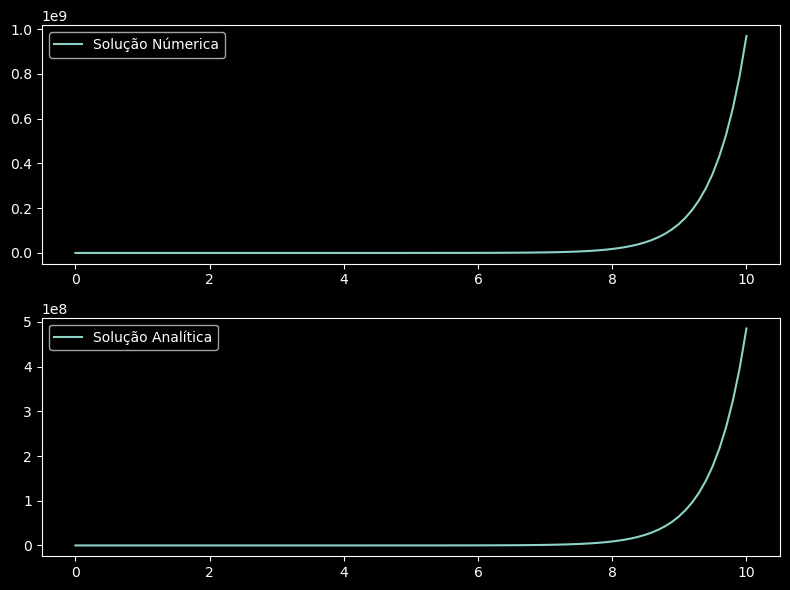

In [3]:
plt.style.use("dark_background")
fig, ax = plt.subplots(2,1, figsize=(8,6))
#ax[0].plot(sol.t,sol.y[0], label="Solução Númerica")
ax[0].plot(sol.t,sol.y[1], label="Solução Númerica")
ax[0].legend()
ax[1].plot(t,np.exp(2*t), label="Solução Analítica")
ax[1].legend()
plt.tight_layout()

In [ ]:
# EDO: y" - 7y' + 10y = 0
# v = y' então v' = y"
# v' - 7v + 10y = 0
# v' = 7v - 10y
# (y',v') = (v, 7v - 10y)

(-5.0, 5.0)

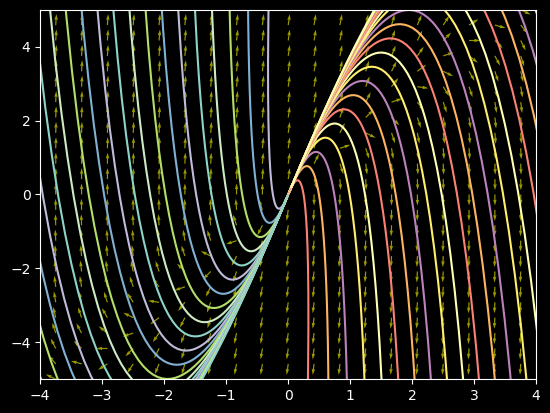

In [190]:
y = np.linspace(-5,5,25)
v = np.linspace(-5,5,25)
Y,V = np.meshgrid(y,v)

DY = V
DV = 7*V - 10*Y

M = np.sqrt(DY**2 + DV**2) + 1e-10
DY = DY/M
DV = DV/M
plt.quiver(Y,V,DY,DV, color="yellow", alpha=0.6)

# Solução Analítica (C1 + C2*exp(3*x))*exp(2*x)
x = np.linspace(-3,3,300)

def traj(C1,C2):
    y = (C1 + C2*np.exp(3*x))*np.exp(2*x)
    dy = (4*C1 + 25*C2*np.exp(3*x))*np.exp(2*x)
    return (y,dy)

for i in range(21):
    C1,C2 = (-i,i)
    y_curve, dy_curve = traj(C1,C2)
    plt.plot(y_curve,dy_curve)
    f = lambda x,y: (y,x)
    C1,C2 = f(C1,C2)
    y_curve, dy_curve = traj(C1,C2)
    plt.plot(y_curve,dy_curve)

plt.xlim(-4,4)
plt.ylim(-5,5)

In [4]:
# EDO: 4y" - 4y' - 3y = 0
def F(t,z):
    y,dydx = z
    dydx2 = 4*dydx + 3*y
    return [dydx,dydx2]

# Condições Inicias
z0 = [1,2]    #y(0) = 1 e y'(0) = 2, 
t = np.linspace(0,10,100)
sol = solve_ivp(F,[0,10],z0, t_eval=t)
y_analitica = (5/4)*np.exp((3/2)*t) - (1/4)*np.exp((-1/2)*t)

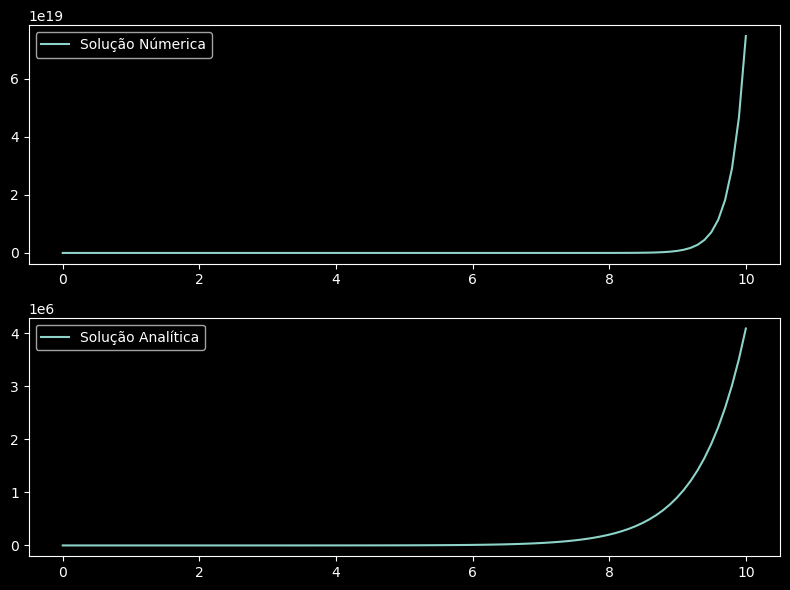

In [5]:
plt.style.use("dark_background")
fig, ax = plt.subplots(2,1, figsize=(8,6))
ax[0].plot(sol.t,sol.y[0], label="Solução Númerica")
ax[0].legend()
ax[1].plot(t,y_analitica, label="Solução Analítica")
ax[1].legend()
plt.tight_layout()

$4y'' - 4y' - 3y = 0$

Fazendo

$ v = y' \text{ logo } v' = y''$

então

$\begin{align} 
4v' - 4v - 3y &= 0 \\ 
v' = v + \frac{3}{4}y
\end{align}$

temos o sistema

$\begin{cases} 
y' = v \\
v' = v + \frac{3}{4}y
\end{cases}$

(-5.0, 5.0)

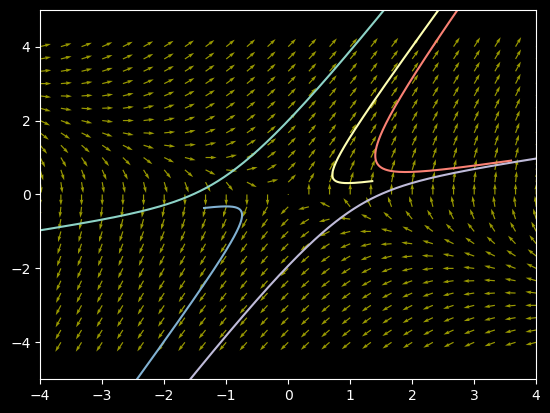

In [250]:
y = np.linspace(-4,4,25)
v = np.linspace(-4,4,25)
Y,V = np.meshgrid(y,v)

DY = V
DV = V + (3/4)*Y

M = np.sqrt(DY**2 + DV**2) + 1e-10
DY = DY/M
DV = DV/M
plt.quiver(Y,V,DY,DV, color="yellow", alpha=0.6)

# Solução Analítica

x = np.linspace(-3,3,300)

def traj2(C1,C2):
    y = C1*np.exp(-x/2) + C2*np.exp(3*x/2)
    dy = (C1*np.exp(-x/2) + 9*C2*np.exp(3*x/2))/4
    return (y,dy)

for i in [(-1, 1), (0.3,1), (1.2,-0.5), (0.8, 0.8), (-0.3,-1.2)]:
    C1,C2 = i
    y_curve, dy_curve = traj2(C1,C2)
    plt.plot(y_curve,dy_curve)

plt.xlim(-4,4)
plt.ylim(-5,5)

In [251]:
import sympy as sp

In [252]:
# EDO: y" - 7y' + 10y = 0
# Condições Inicias y(0) = 1 e y'(0) = 2

In [253]:
x = sp.Symbol('x')
y = sp.Function('y')(x)
y

y(x)

In [254]:
EDO = sp.Eq(y.diff(x,2) - 7*y.diff(x) + 10*y,0)
EDO

Eq(10*y(x) - 7*Derivative(y(x), x) + Derivative(y(x), (x, 2)), 0)

In [255]:
sol = sp.dsolve(EDO)
print(sol.rhs)

(C1 + C2*exp(3*x))*exp(2*x)


In [256]:
C1,C2,x = sp.symbols('C1 C2 x')
f = (C1 + C2*sp.exp(3*x))*sp.exp(2*x)
print(f.diff(x,2))

(4*C1 + 25*C2*exp(3*x))*exp(2*x)


In [257]:
PVI = {y.subs(x,0):1,y.diff(x).subs(x,0):2}
PVI

{y(0): 1, Subs(Derivative(y(x), x), x, 0): 2}

In [258]:
sol = sp.dsolve(EDO,ics=PVI)
sol

Eq(y(x), exp(2*x))

In [259]:
f = sp.lambdify(x,sol.rhs,"numpy")

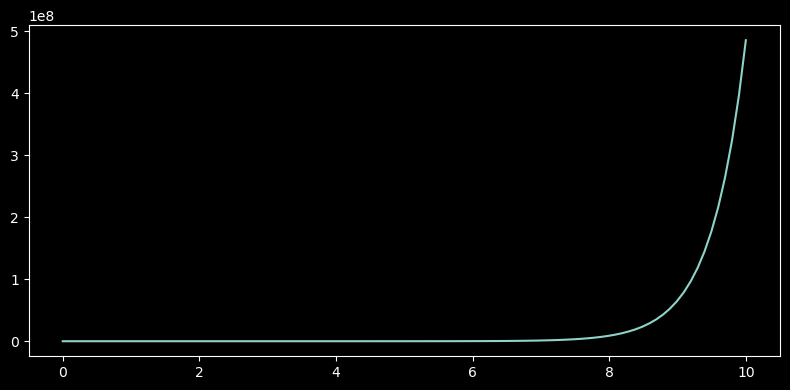

In [260]:
plt.figure(figsize=(8,4))
plt.plot(t, f(t))
plt.tight_layout()

In [261]:
# EDO: 4y" - 4y' - 3y = 0
# Condições Inicias y(0) = 1 e y'(0) = 2

In [262]:
x = sp.Symbol('x')
y = sp.Function('y')(x)
y

y(x)

In [263]:
EDO2 = sp.Eq(4*y.diff(x,2) - 4*y.diff(x) - 3*y,0)
EDO2

Eq(-3*y(x) - 4*Derivative(y(x), x) + 4*Derivative(y(x), (x, 2)), 0)

In [264]:
sol2 = sp.dsolve(EDO2)
print(sol2)

Eq(y(x), C1*exp(-x/2) + C2*exp(3*x/2))


In [265]:
C1,C2,x = sp.symbols('C1 C2 x')
g = C1*sp.exp(-x/2) + C2*sp.exp(3*x/2)
print(g.diff(x,2))

(C1*exp(-x/2) + 9*C2*exp(3*x/2))/4


In [266]:
PVI = {y.subs(x,0):1,y.diff(x).subs(x,0):2}
PVI

{y(0): 1, Subs(Derivative(y(x), x), x, 0): 2}

In [267]:
sol2 = sp.dsolve(EDO2)
sol2

Eq(y(x), C1*exp(-x/2) + C2*exp(3*x/2))

In [268]:
sol2 = sp.dsolve(EDO2,ics=PVI)
sol2

Eq(y(x), 5*exp(3*x/2)/4 - exp(-x/2)/4)

In [269]:
g = sp.lambdify(x,sol2.rhs,"numpy")

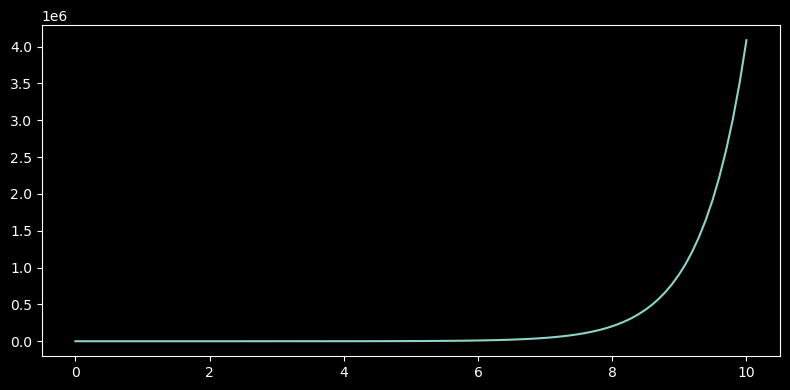

In [270]:
plt.figure(figsize=(8,4))
plt.plot(t,g(t))
plt.tight_layout()

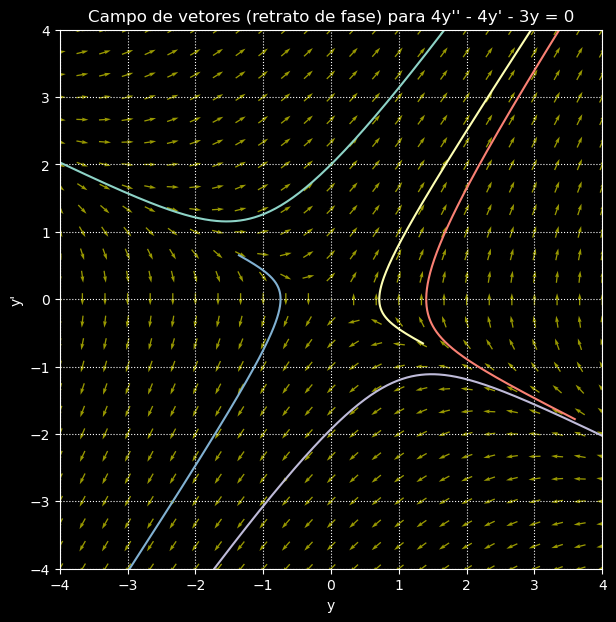

In [271]:
import numpy as np
import matplotlib.pyplot as plt

# grade no plano (y, y')
y = np.linspace(-4, 4, 25)
v = np.linspace(-4, 4, 25)  # v = y'
Y, V = np.meshgrid(y, v)

# campo: (dy/dt, dv/dt) = (v, v + 0.75*y)
dY = V
dV = V + 0.75 * Y

# normalização opcional para visualização
mag = np.sqrt(dY**2 + dV**2) + 1e-9
dYn = dY / mag
dVn = dV / mag

plt.figure(figsize=(7,7))
plt.quiver(Y, V, dYn, dVn, pivot='mid', color="yellow", alpha=0.6)
plt.xlabel("y")
plt.ylabel("y'")
plt.title("Campo de vetores (retrato de fase) para 4y'' - 4y' - 3y = 0")

# Solução analítica:
# y(t) = C1 e^{(3/2)t} + C2 e^{(-1/2)t}
# y'(t) = (3/2) C1 e^{(3/2)t} - (1/2) C2 e^{(-1/2)t}
ts = np.linspace(-3, 3, 400)

def traj(C1, C2):
    y = C1*np.exp(1.5*ts) + C2*np.exp(-0.5*ts)
    yp = 1.5*C1*np.exp(1.5*ts) - 0.5*C2*np.exp(-0.5*ts)
    return y, yp

# algumas curvas com diferentes (C1,C2)
ics = [(1, -1), (1, 0.3), (-0.5, 1.2), (0.8, 0.8), (-1.2, -0.3)]
for C1, C2 in ics:
    y_curve, yp_curve = traj(C1, C2)
    plt.plot(y_curve, yp_curve, linewidth=1.5)

plt.grid(True, linestyle=':')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()